# Exploration 01
## 가위바위보 분류기 만들기 

# 1. 데이터 준비 

### Teachable Machine을 이용하여 데이터 만들기 
가위, 바위, 보 각각 100자의 사진 준비

![title](images/teachable_machine.png)

In [18]:
from PIL import Image
import glob
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

## Image reshape
사진의 크기를 224x224에서 28x28로 변경

In [16]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [17]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


## Upload x_train, y_train set & Nomalization
각 파일에 jpg이미지만 골라 업로드     
가위: 0, 바위: 1, 보: 2 각각 라벨링 수행     
x_train image를 최대값인 255로 나눠 정규화 수행

In [7]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


## Check x_train 
x_train image확인 

라벨:  0


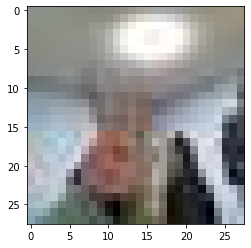

In [19]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 2. 네트워크 설계

## Create network & network check
tensorflow keras의 Sequential API를 이용하여 네트워크 구성      

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 53, 53, 64)        9280      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2768960   
_________________________________________________________________
dense_15 (Dense)             (

# 3. 모델 학습

## Model training
Epoch 10으로 model training (너무 많은 Epoch를 줄 경우 overfitting발생)

In [67]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
29/29 [==============================] - 1s 11ms/step - loss: 69.8332 - accuracy: 0.3744
Epoch 2/10
29/29 [==============================] - 0s 9ms/step - loss: 0.3461 - accuracy: 0.8733
Epoch 3/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9967
Epoch 4/10
29/29 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 5/10
29/29 [==============================] - 0s 8ms/step - loss: 6.2295e-05 - accuracy: 1.0000
Epoch 6/10
29/29 [==============================] - 0s 8ms/step - loss: 2.6545e-05 - accuracy: 1.0000
Epoch 7/10
29/29 [==============================] - 0s 8ms/step - loss: 1.6187e-05 - accuracy: 1.0000
Epoch 8/10
29/29 [==============================] - 0s 8ms/step - loss: 1.0753e-05 - accuracy: 1.0000
Epoch 9/10
29/29 [==============================] - 0s 8ms/step - loss: 8.4188e-06 - accuracy: 1.0000
Epoch 10/10
29/29 [==============================] - 0s 8ms/step - loss: 5.1979e-06 - accuracy: 

# 4. 모델 성능 평가

## Image reshape & Upload x_test, y_test set & Nomalization
test image를 224x224에서 28x28로 reshape     
load_data()함수를 이용해 x_train, y_train upload

In [68]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (900, 112, 112, 3)
y_test shape: (900,)


## Accuracy check
evaluate()함수를 이용하여 정확성 확인

In [70]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 1.3804 - accuracy: 0.1256
test_loss: 1.3804447650909424 
test_accuracy: 0.12555555999279022


## Check wrong test set
test결과중 잘 못 분류된 이미지 확인

In [49]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.07558632 0.35537526 0.56903845]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [0.01258519 0.23104148 0.75637335]
라벨: 0, 예측결과: 2


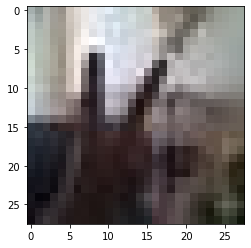

예측확률분포: [1.0682698e-01 1.9246972e-06 8.9317113e-01]
라벨: 1, 예측결과: 2


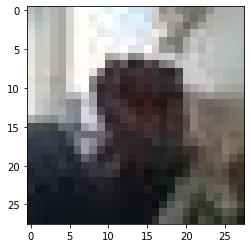

예측확률분포: [0.04364088 0.47890887 0.47745028]
라벨: 0, 예측결과: 1


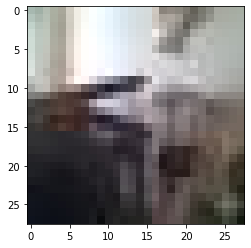

예측확률분포: [4.39930242e-04 8.75396967e-01 1.24163084e-01]
라벨: 0, 예측결과: 1


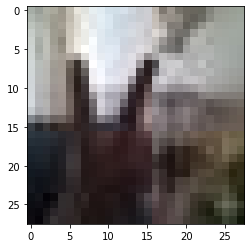

예측확률분포: [3.8565899e-04 8.7762523e-01 1.2198909e-01]
라벨: 2, 예측결과: 1


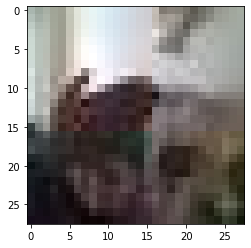

In [50]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 최종 평가 
train set -> 가위, 바위, 보 각각 100장 총 300장 
test set -> 가위, 바위, 보 각각 100장 총 300장
network model -> tensorflow keras Sequential API를 활용한 LeNet활용

결과 
- 성능 평가 : 0.3400000035762787       

결과 분석(예측)
- 224x224사이즈의 이미지를 28x28로 변경하니 성능이 떨어짐
- test set의 표본이 너무 적음 (현재 300장)
- validation set을 활용하면 더 좋을 것으로 예상



---

# 결과 분석을 토대로 정확성 높이기

## 1. dataset의 표본 늘리기
가위, 바위, 보 각각 300개의 이미지 셋 (총 900개)

## 2. test set의 사이즈를 112x112로 변경
resize_images() 수정 -> 112x112로 수정

### Reshape image

In [52]:
def resize_images_new(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [53]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images_new(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images_new(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images_new(image_dir_path)
print("보 이미지 resize 완료!")

300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


### Upload data 

In [86]:
import numpy as np

def load_data_new(img_path, number_of_data=900):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_dataset)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_dataset, y_dataset)=load_data_new(image_dir_path)

print("x_dataset shape: {}".format(x_dataset.shape))
print("y_dataset shape: {}".format(y_dataset.shape))

학습데이터(x_dataset)의 이미지 개수는 900 입니다.
x_dataset shape: (900, 112, 112, 3)
y_dataset shape: (900,)


## 3. validation set 구분
dataset을 섞어서 train, validation, test로 구분

### Split dataset 

In [73]:
def train_val_test_split(ds, ds_size, sd,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

In [74]:
x_train_new, x_val_new, x_test_new = train_val_test_split(x_dataset,900,42)
y_train_new, y_val_new, y_test_new = train_val_test_split(y_dataset,900,42)

### Check train, val, test

In [87]:
print(x_train_new.shape)
print(x_val_new.shape)
print(x_test_new.shape)
print(y_train_new.shape)
print(y_val_new.shape)
print(y_test_new.shape)

(720, 112, 112, 3)
(90, 112, 112, 3)
(90, 112, 112, 3)
(720,)
(90,)
(90,)


라벨:  2


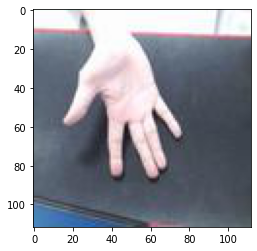

In [84]:
plt.imshow(x_train_new[1])
print('라벨: ', y_train_new[1])

라벨:  1


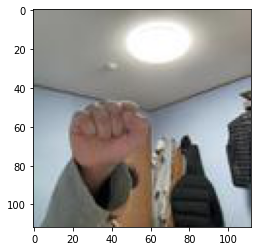

In [88]:
plt.imshow(x_val_new[1])
print('라벨: ', y_val_new[1])

라벨:  2


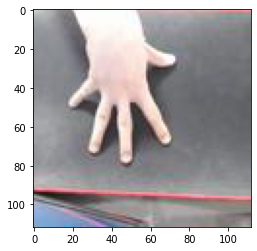

In [89]:
plt.imshow(x_test_new[1])
print('라벨: ', y_test_new[1])

### Create network model
이전과 똑같이 설계

In [90]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [91]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                692256    
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

### Model training 

In [92]:
x_train_new_norm = x_train_new / 255.0

In [93]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 8ms/step - loss: 1.1742 - accuracy: 0.4028
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 0.9175 - accuracy: 0.5972
Epoch 3/10
23/23 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.6514
Epoch 4/10
23/23 [==============================] - 0s 6ms/step - loss: 0.5425 - accuracy: 0.6597
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 0.4307 - accuracy: 0.7903
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 0.2623 - accuracy: 0.9458
Epoch 7/10
23/23 [==============================] - 0s 6ms/step - loss: 0.1598 - accuracy: 0.9750
Epoch 8/10
23/23 [==============================] - 0s 7ms/step - loss: 0.1234 - accuracy: 0.9736
Epoch 9/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0847 - accuracy: 0.9806
Epoch 10/10
23/23 [==============================] - 0s 6ms/step - loss: 0.0812 - accuracy: 0.9778


### Accuracy check for validation

In [94]:
test_loss, test_accuracy = model.evaluate(x_val_new, y_val_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

3/3 - 0s - loss: 9.3219 - accuracy: 0.9778
test_loss : 9.32190990447998
test_accuracy : 0.9777777791023254


### Accuracy check for test

In [99]:
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

3/3 - 0s - loss: 2.3830 - accuracy: 0.9889
test_loss : 2.382979154586792
test_accuracy : 0.9888888597488403


## Check wrong test set
test결과중 잘 못 분류된 이미지 확인

In [100]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 0. 1.]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


예측확률분포: [0. 1. 0.]
라벨: 2, 예측결과: 1


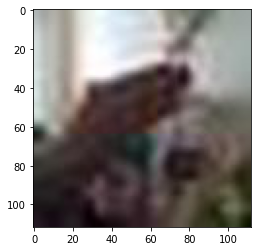

In [106]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 1개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=1)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 최종 분석
### 최종 정확도 0.9888888597488403

처음 시도에서는 내 손 이미지 300장을 가지고 train set을 구성하고 다른 사람 손 이미지 300장을 가지고 test set을 구성하였더니 정확성이 0.34밖에 나오지 않았다.        
       
1차 결과 분석(예측)
- 224x224사이즈의 이미지를 28x28로 변경하니 성능이 떨어짐
- test set의 표본이 너무 적음 (현재 300장)
- validation set을 활용하면 더 좋을 것으로 예상

그러나 1차결과분석을 토대로 dataset의 표본을 늘려주고 이미지를 무작위로 섞어서 모델을 구현하니 0.9888888597488403의 성능을 얻었다.         
      
이후 더 좋은 모델 예측
- 더 많은 표본을 확보하면 더 좋은 모델을 설계할 수 있을거라고 예측
- 빛, 크기 등의 일정한 dataset을 구성하면 더 좋은 모델을 설계할 수 있을거라고 예상 